# Manipulating Tensors in PyTorch

PyTorch is a deep learning library. 
Just like some other deep learning libraries, it applies operations on numerical arrays called **tensors**. 
In the simplest terms, tensors are just multidimensional arrays. 
When we are dealing with the tensors, there are some operations that are used very often. 
In PyTorch, there are some functions defined specifically for dealing with tensors.

## Outcome

In the following, we will have a brief overview of what PyTorch provides on tensors and how we can use them. 
After finishing this tutorial, you will know:

- How to create and operate on PyTorch tensors
- PyTorch’s tensor syntax is similar to NumPy
- The common functions you can use from PyTorch to manipulate a tensor

## Overview

This tutorial is in three parts; they are:

- Creating Tensors
- Checking a Tensor
- Manipulating Tensors
- Tensor Functions

## Creating Tensors

If you’re familiar with NumPy, you should recall that there are multiple ways of creating an array. 
Same is true in PyTorch for creating tensors. 
The simplest way to create a specific constant matrix like the following:

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$

is the following:

In [1]:
import torch
a = torch.tensor([[1,2,3], [4,5,6]], dtype=torch.int32)
print(a)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


The `dtype` argument is to specify the data type of the values in the tensor. 
It is optional. 
You can also provide the values from a NumPy array and convert it to PyTorch tensor.

Usually, you would create a tensor for some specific purpose. 
For example, you want to have 10 values evenly distributed between -1 and 1, you can use the `linspace()` function:

In [2]:
a = torch.linspace(-1, 1, 10)
print(a)

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])


However, if you would like to have a tensor of random values (which is very useful in testing your functions), you can make one like the following:

In [3]:
a = torch.rand(3,4)
print(a)

tensor([[0.0166, 0.9437, 0.8294, 0.9863],
        [0.9638, 0.8340, 0.8370, 0.0552],
        [0.0873, 0.7052, 0.1047, 0.1324]])


This resulting tensor is of dimension $3\times 4$ and each value is uniformly distributed between 0 and 1. 
If you would like to have the values normally distributed, just change the function to randn():

In [4]:
a = torch.randn(3,4)

If you want to have the random values to be integer, e.g., between 3 to 10, you can use the randint() function:

In [5]:
a = torch.randint(3, 10, size=(3,4))
print(a)

tensor([[4, 4, 4, 8],
        [9, 4, 5, 6],
        [8, 4, 4, 8]])


The values are in the range $3 \le x < 10$. 
By default the lowerbound is zero, so if you want the values to be $0 \le x < 10$, you can use:

In [6]:
a = torch.randint(10, size=(3,4))

The other commonly used tensors are the zero tensor and tensors with all values the same. 
To create a zero tensor (e.g., of dimension $2\times 3\times 4$), you can do:

In [7]:
a = torch.zeros(2, 3, 4)
print(a)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


and to create a tensor of all values are 5, we can do

In [8]:
a = torch.full((2,3,4), 5)
print(a)

tensor([[[5, 5, 5, 5],
         [5, 5, 5, 5],
         [5, 5, 5, 5]],

        [[5, 5, 5, 5],
         [5, 5, 5, 5],
         [5, 5, 5, 5]]])


But if you want all values are one, there is a simpler function:

In [9]:
a = torch.ones(2,3,4)

Finally, if you want an identity matrix, you can get it with diag() or eye():

In [10]:
a = torch.eye(4)
print(a)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


## Checking a Tensor

Once you have a tensor and you want to know more about it, you can simply print it to the screen using print(). 
But if the tensor is too big, it is easier to show its dimension by checking its shape:

In [11]:
a = torch.zeros(2, 3, 4)
print(a.shape)
print(a.size())

torch.Size([2, 3, 4])
torch.Size([2, 3, 4])


The shape of a tensor can be accessed using the shape property or the size() function. 
If you want to see how many dimensions you have (i.e., $2\times 3\times 4$ is 3 and $3\times 4$ is 2), you can read the ndim property:

In [12]:
print(a.ndim)

3


This will give you “3”. 
If you use len() to check a tensor, it will only give you the size of the first dimension, e.g.,

In [13]:
a = torch.zeros(2, 3, 4)
print(len(a))

2


Another property that we would like to learn about a tensor is its data type. 
Usually we use floating points in deep learning but sometimes the tensors should be in integers (e.g., in image as pixel values). 
To check the data type, you can read the dtype property:

In [14]:
print(a.dtype)

torch.float32


If you would like to change the data type, you can recreate the tensor with a new type:

In [15]:
b = a.type(torch.int32)
print(a.dtype)
print(b.dtype)

torch.float32
torch.int32


## Manipulating Tensors

One common operation on tensors in deep learning is to change the tensor shape. 
For example, you may want to convert a 2D tensor into 1D or add a dummy dimension to a tensor. 
You may also want to extract a sub-tensor from a larger tensor.

For example, we create a tensor like the following:

In [16]:
a = torch.randn(3,4,5)
print(a)

tensor([[[-9.7573e-03,  1.5528e-02, -8.5189e-01, -2.9001e-01,  2.5358e-01],
         [-1.3513e+00,  4.5173e-01, -1.5077e+00,  3.1679e-01, -1.4999e+00],
         [ 1.8048e-01, -7.4296e-01, -6.5932e-01, -8.7744e-01,  3.7287e-04],
         [-1.4496e+00,  1.9565e+00,  1.2035e+00, -3.7327e-01,  4.9495e-01]],

        [[-1.4704e+00, -8.2621e-01,  2.3944e+00,  1.3055e-01,  6.9880e-01],
         [ 3.8458e-01,  4.8313e-01, -9.9494e-01,  8.4061e-01,  6.3490e-01],
         [-1.5241e+00,  1.2852e+00,  1.2445e+00, -1.7360e+00, -3.8047e-01],
         [-4.1802e-01,  1.2455e+00,  2.6090e+00, -1.0877e+00,  1.1010e-01]],

        [[ 3.4436e-01,  5.9212e-01, -1.1288e+00,  1.9448e+00, -7.8291e-01],
         [ 2.7030e-01,  1.9833e-01, -1.0971e-01,  1.3148e+00, -5.3581e-01],
         [-3.7642e-02,  4.3662e-01,  7.6423e-01,  3.0405e-01,  2.2825e-01],
         [ 1.2799e-01,  8.4099e-01,  2.9353e-01,  2.4682e-01, -9.1288e-01]]])


We can take a slice using the same syntax as in NumPy:

In [17]:
print(a[1])

tensor([[-1.4704, -0.8262,  2.3944,  0.1306,  0.6988],
        [ 0.3846,  0.4831, -0.9949,  0.8406,  0.6349],
        [-1.5241,  1.2852,  1.2445, -1.7360, -0.3805],
        [-0.4180,  1.2455,  2.6090, -1.0877,  0.1101]])


or

In [18]:
print(a[1:, 2:4])

tensor([[[-1.5241,  1.2852,  1.2445, -1.7360, -0.3805],
         [-0.4180,  1.2455,  2.6090, -1.0877,  0.1101]],

        [[-0.0376,  0.4366,  0.7642,  0.3040,  0.2282],
         [ 0.1280,  0.8410,  0.2935,  0.2468, -0.9129]]])


You can also make use of the same slicing syntax to add a new dimension. 
For example,

In [19]:
print(a[:, None, :, None].shape)

torch.Size([3, 1, 4, 1, 5])


Here you use None to insert a new dimension at a specific place. 
This is useful if, for example, need to convert an image into a batch of only one image. 
If you’re familiar with NumPy, you may recall there is a function expand_dims() for this purpose but PyTorch doesn’t provide it. 
The similar function is unsqueeze(), which is demonstrated below:

In [20]:
b = torch.unsqueeze(a, dim=2)
print(a.shape)
print(b.shape)

torch.Size([3, 4, 5])
torch.Size([3, 4, 1, 5])


One powerful nature of NumPy slicing syntax is boolean indexing. 
This is also supported with PyTorch tensors. 
For example:

In [21]:
a = torch.randn(3,4)
print(a)
print(a[:, (a > -1).all(axis=0)])

tensor([[ 0.4848, -1.3360, -0.4340,  2.0908],
        [-1.5166, -0.8107, -1.2551, -0.5837],
        [ 0.4458, -0.8810,  0.3182, -0.2751]])
tensor([[ 2.0908],
        [-0.5837],
        [-0.2751]])


The above selects the columns that all elements are greater than -1. 
We can also manipulate the tensor by selecting specific columns:

In [22]:
print(a[:, [1,0,0,1]])

tensor([[-1.3360,  0.4848,  0.4848, -1.3360],
        [-0.8107, -1.5166, -1.5166, -0.8107],
        [-0.8810,  0.4458,  0.4458, -0.8810]])


To convert a 2D tensor into 1D, we can use

In [23]:
a = torch.randn(3,4)
print(a)
print(a.ravel())

tensor([[-1.2973, -0.4192,  0.8145, -0.0796],
        [-0.5544,  1.7478,  1.3380, -0.9063],
        [-0.4452, -0.0501,  1.2753, -0.9824]])
tensor([-1.2973, -0.4192,  0.8145, -0.0796, -0.5544,  1.7478,  1.3380, -0.9063,
        -0.4452, -0.0501,  1.2753, -0.9824])


You may also use reshape() function to achieve the same:

In [24]:
print(a.reshape(-1))

tensor([-1.2973, -0.4192,  0.8145, -0.0796, -0.5544,  1.7478,  1.3380, -0.9063,
        -0.4452, -0.0501,  1.2753, -0.9824])


which the result should be same as that of `ravel()`. 
But usually, reshape() function is for more complicated target shapes:

One common case of reshaping tensors is to do matrix transpose. 
For a 2D matrix, it is easily done in the same way as NumPy:

In [25]:
print(a.T)

tensor([[-1.2973, -0.5544, -0.4452],
        [-0.4192,  1.7478, -0.0501],
        [ 0.8145,  1.3380,  1.2753],
        [-0.0796, -0.9063, -0.9824]])


But the transpose() function in PyTorch requires you to specify which axes to swap explicitly:

In [26]:
print(a.transpose(0, 1))

tensor([[-1.2973, -0.5544, -0.4452],
        [-0.4192,  1.7478, -0.0501],
        [ 0.8145,  1.3380,  1.2753],
        [-0.0796, -0.9063, -0.9824]])


This result is same as above. 
If you have multiple tensors, you can combine them by stacking (vstack() for vertically and hstack() for horizontally). 
For example:

In [27]:
a = torch.randn(3,3)
b = torch.randn(3,3)
print(a)
print(b)
print(torch.vstack([a,b]))

tensor([[-0.7133,  0.1701, -0.1186],
        [-0.7340, -0.4716,  0.6322],
        [-0.8439,  0.8442,  1.2592]])
tensor([[ 1.8338, -0.4414, -0.6014],
        [ 0.2420, -0.0519,  0.2580],
        [ 0.9669, -0.0602, -0.8603]])
tensor([[-0.7133,  0.1701, -0.1186],
        [-0.7340, -0.4716,  0.6322],
        [-0.8439,  0.8442,  1.2592],
        [ 1.8338, -0.4414, -0.6014],
        [ 0.2420, -0.0519,  0.2580],
        [ 0.9669, -0.0602, -0.8603]])


The concatenate function is similar:

In [28]:
c = torch.concatenate([a, b])
print(c)

tensor([[-0.7133,  0.1701, -0.1186],
        [-0.7340, -0.4716,  0.6322],
        [-0.8439,  0.8442,  1.2592],
        [ 1.8338, -0.4414, -0.6014],
        [ 0.2420, -0.0519,  0.2580],
        [ 0.9669, -0.0602, -0.8603]])


The reverse is to split, e.g.,

In [29]:
print(torch.vsplit(c, 2))

(tensor([[-0.7133,  0.1701, -0.1186],
        [-0.7340, -0.4716,  0.6322],
        [-0.8439,  0.8442,  1.2592]]), tensor([[ 1.8338, -0.4414, -0.6014],
        [ 0.2420, -0.0519,  0.2580],
        [ 0.9669, -0.0602, -0.8603]]))


This function tells how many tensors to split into, rather than what size is each tensor. 
The latter is indeed more useful in deep learning (e.g., to split a tensor of a large dataset into many tensors of small batches). 
The equivalent function would be:

In [30]:
print(torch.split(c, 3, dim=0))

(tensor([[-0.7133,  0.1701, -0.1186],
        [-0.7340, -0.4716,  0.6322],
        [-0.8439,  0.8442,  1.2592]]), tensor([[ 1.8338, -0.4414, -0.6014],
        [ 0.2420, -0.0519,  0.2580],
        [ 0.9669, -0.0602, -0.8603]]))


This should give you the same result as before. 
Which split(c, 3, dim=0) means to split on dimension 0 such that each resulting tensor will be of size 3.

## Tensor Functions

PyTorch tensors can be treated as arrays. 
So you can often use it the similar way as NumPy arrays. 
For example, you have the functions of common mathematical functions:

In [31]:
a = torch.randn(2,3)
print(a)
print(torch.exp(a))
print(torch.log(a))
print(torch.sin(a))
print(torch.arctan(a))
print(torch.abs(a))
print(torch.square(a))
print(torch.sqrt(a))
print(torch.ceil(a))
print(torch.round(a))
print(torch.clip(a, 0.1, 0.9))

tensor([[-0.7331,  1.2827,  0.9408],
        [ 1.5131, -0.6866,  1.5492]])
tensor([[0.4804, 3.6064, 2.5621],
        [4.5408, 0.5033, 4.7075]])
tensor([[    nan,  0.2490, -0.0610],
        [ 0.4142,     nan,  0.4377]])
tensor([[-0.6691,  0.9588,  0.8081],
        [ 0.9983, -0.6339,  0.9998]])
tensor([[-0.6326,  0.9086,  0.7549],
        [ 0.9868, -0.6017,  0.9976]])
tensor([[0.7331, 1.2827, 0.9408],
        [1.5131, 0.6866, 1.5492]])
tensor([[0.5374, 1.6453, 0.8852],
        [2.2895, 0.4715, 2.3999]])
tensor([[   nan, 1.1326, 0.9700],
        [1.2301,    nan, 1.2447]])
tensor([[-0., 2., 1.],
        [2., -0., 2.]])
tensor([[-1.,  1.,  1.],
        [ 2., -1.,  2.]])
tensor([[0.1000, 0.9000, 0.9000],
        [0.9000, 0.1000, 0.9000]])


Note that, if a function is undefined (e.g., square root of negative numbers), nan will be resulted but no exception will be raised. 
In PyTorch, we have a function to check if values of a tensor is nan:

In [32]:
b = torch.sqrt(a)
print(b)
print(torch.isnan(b))

tensor([[   nan, 1.1326, 0.9700],
        [1.2301,    nan, 1.2447]])
tensor([[ True, False, False],
        [False,  True, False]])


Indeed, besides these defined functions, the Python operators can be applied to the tensors too:

In [33]:
a = torch.randn(2, 3)
b = torch.randn(2, 3)
print(a)
print(b)
print(a+b)
print(a/b)
print(a ** 2)

tensor([[ 1.2907,  0.2678, -0.8833],
        [-0.4300, -1.1237,  0.6984]])
tensor([[ 0.2080,  1.5854, -0.6169],
        [ 0.6164,  1.4917,  0.7038]])
tensor([[ 1.4988,  1.8533, -1.5002],
        [ 0.1863,  0.3680,  1.4022]])
tensor([[ 6.2047,  0.1689,  1.4318],
        [-0.6977, -0.7533,  0.9924]])
tensor([[1.6660, 0.0717, 0.7802],
        [0.1849, 1.2626, 0.4878]])


But among the operators, the matrix multiplications are very important in deep learning. 
We can do so with:

In [34]:
print(torch.matmul(a, b.T))
print(a @ b.T)

tensor([[ 1.2381,  0.5734],
        [-2.3018, -1.4497]])
tensor([[ 1.2381,  0.5734],
        [-2.3018, -1.4497]])


These two are the same. 
Indeed, the @ operator from Python can also be used for vector dot-product, e.g.

In [35]:
a = torch.randn(3)
b = torch.randn(3)
print(a)
print(b)
print(torch.dot(a, b))
print(a @ b)

tensor([ 0.8490,  0.5279, -1.1239])
tensor([-1.0498,  0.4471,  0.2047])
tensor(-0.8854)
tensor(-0.8854)


If you treat the values in a tensor as samples, you may also want to find some statistics about it. 
Some are provided in PyTorch, too:

In [36]:
a = torch.randn(3,4)
print(a)
print(torch.mean(a, dim=0))
print(torch.std(a, dim=0))
print(torch.cumsum(a, dim=0))
print(torch.cumprod(a, dim=0))

tensor([[ 1.6436, -0.0441, -0.7463,  2.4242],
        [ 0.7685,  0.8405, -1.0319,  1.6302],
        [ 2.6640, -1.3120, -0.5682, -0.9738]])
tensor([ 1.6921, -0.1719, -0.7821,  1.0269])
tensor([0.9487, 1.0819, 0.2339, 1.7775])
tensor([[ 1.6436, -0.0441, -0.7463,  2.4242],
        [ 2.4122,  0.7964, -1.7782,  4.0544],
        [ 5.0762, -0.5156, -2.3464,  3.0806]])
tensor([[ 1.6436, -0.0441, -0.7463,  2.4242],
        [ 1.2632, -0.0371,  0.7701,  3.9519],
        [ 3.3652,  0.0486, -0.4376, -3.8485]])


But for linear algebra functions, you should find it in PyTorch’s linalg submodule. 
For example:

In [37]:
print(torch.linalg.svd(a))

torch.return_types.linalg_svd(
U=tensor([[ 0.7590,  0.2694,  0.5927],
        [ 0.4811,  0.3814, -0.7894],
        [ 0.4387, -0.8843, -0.1599]]),
S=tensor([3.7884, 3.0581, 0.7359]),
Vh=tensor([[ 0.7354, -0.0540, -0.3464,  0.5799],
        [-0.5297,  0.4803, -0.0301,  0.6985],
        [-0.0792, -0.6521,  0.6292,  0.4155],
        [ 0.4152,  0.5841,  0.6952, -0.0568]]))


And specifically for convolution neural networks, padding a tensor is done with the following:

In [38]:
b = torch.nn.functional.pad(a, (1,1,0,2), value=0)
print(b)

tensor([[ 0.0000,  1.6436, -0.0441, -0.7463,  2.4242,  0.0000],
        [ 0.0000,  0.7685,  0.8405, -1.0319,  1.6302,  0.0000],
        [ 0.0000,  2.6640, -1.3120, -0.5682, -0.9738,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])


This example of pad() function is to create (1,1) padding on dimension 0 and (0,2) on dimension 1. 
In other words, for each dimension 0 (rows), we add one dummy value (0) at the beginning and at the end. 
For each dimension 1 (columns), we add zero dummy values at the beginning but two dummy values at the end.

Finally, since PyTorch tensors can be considered as arrays, you can use them directly with other tools such as matplotlib. 
Below is an example of plotting a surface using PyTorch tensors:

tensor([[-1.0000, -0.9798, -0.9596,  ...,  0.9596,  0.9798,  1.0000],
        [-1.0000, -0.9798, -0.9596,  ...,  0.9596,  0.9798,  1.0000],
        [-1.0000, -0.9798, -0.9596,  ...,  0.9596,  0.9798,  1.0000],
        ...,
        [-1.0000, -0.9798, -0.9596,  ...,  0.9596,  0.9798,  1.0000],
        [-1.0000, -0.9798, -0.9596,  ...,  0.9596,  0.9798,  1.0000],
        [-1.0000, -0.9798, -0.9596,  ...,  0.9596,  0.9798,  1.0000]])


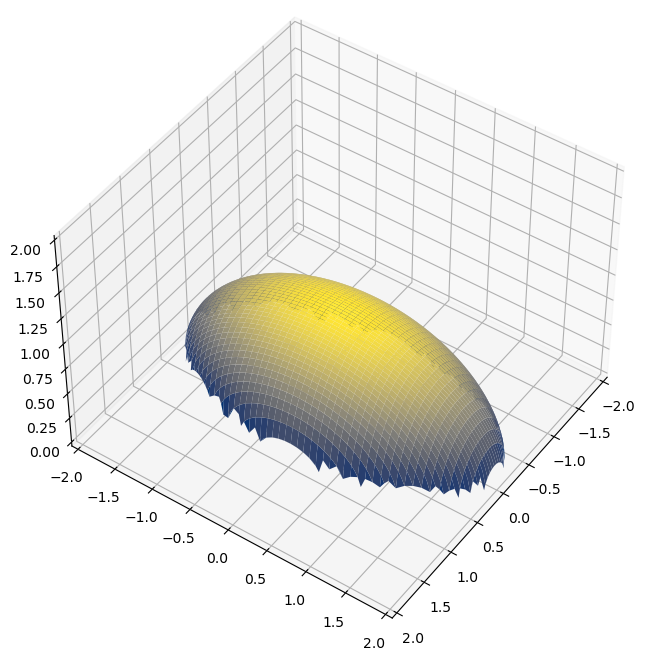

In [39]:
import matplotlib.pyplot as plt
import torch

# create tensors
x = torch.linspace(-1, 1, 100)
y = torch.linspace(-2, 2, 100)
# create the surface
xx, yy = torch.meshgrid(x, y, indexing="xy") # xy-indexing is matching numpy
z = torch.sqrt(1 - xx**2 - (yy/2)**2)
print(xx)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([0, 2])
ax.plot_surface(xx, yy, z, cmap="cividis")
ax.view_init(45, 35)
plt.show()

## Summary

In this tutorial, you discovered how to manipulate PyTorch tensors. 
Specifically you learned:

- What is a tensor
- How to create various kinds of tensors in PyTorch
- How to reshape, slice, and manipulate tensors in PyTorch
- The common functions that can be applied to PyTorch tensors